# Pr9-3: Objファイル形式

## 3Dモデルデータの表現

Objファイルの中身を見てみましょう．

- **頂点構造**と**面構造**をテキストデータで管理
- 読みやすい構造⇒Pythonでも解析しやすい


### 頂点情報



```
# 頂点座標 (x, y, z)
v 1.000000 -1.000000 -1.000000

# テクスチャ座標 (u, v)
vt 0.875000 0.500000

# 法線座標 (nx, ny, nz)
vn 0.875000 0.500000

```

### 面情報

```
# (頂点ID/テクスチャID/法線ID) 
f 4/5/2 3/4/2 7/6/2 8/7/2
```




In [2]:
!cat cube.obj

# Blender v2.92.0 OBJ File: ''
# www.blender.org
mtllib cube.mtl
o Cube
v 1.000000 1.000000 -1.000000
v 1.000000 -1.000000 -1.000000
v 1.000000 1.000000 1.000000
v 1.000000 -1.000000 1.000000
v -1.000000 1.000000 -1.000000
v -1.000000 -1.000000 -1.000000
v -1.000000 1.000000 1.000000
v -1.000000 -1.000000 1.000000
vt 0.625000 0.500000
vt 0.875000 0.500000
vt 0.875000 0.750000
vt 0.625000 0.750000
vt 0.375000 0.750000
vt 0.625000 1.000000
vt 0.375000 1.000000
vt 0.375000 0.000000
vt 0.625000 0.000000
vt 0.625000 0.250000
vt 0.375000 0.250000
vt 0.125000 0.500000
vt 0.375000 0.500000
vt 0.125000 0.750000
vn 0.0000 1.0000 0.0000
vn 0.0000 0.0000 1.0000
vn -1.0000 0.0000 0.0000
vn 0.0000 -1.0000 0.0000
vn 1.0000 0.0000 0.0000
vn 0.0000 0.0000 -1.0000
usemtl Material
s off
f 1/1/1 5/2/1 7/3/1 3/4/1
f 4/5/2 3/4/2 7/6/2 8/7/2
f 8/8/3 7/9/3 5/10/3 6/11/3
f 6/12/4 2/13/4 4/5/4 8/14/4
f 2/13/5 1/1/5 3/4/5 4/5/5
f 6/11/6 5/10/6 1/1/6 2/13/6


## Objファイルの解析

以下のような関数でObjファイルのテキストデータを解析できます．

変換部分のポイントはテキスト解析で以下の形が基本となっています．

```
# 1行ずつの処理
for line in open(fliePath, "r"):
  # スペース区切りで文字列を分割
  vals = line.split()

  # 一番初めのコードが"v"⇒頂点読み取り
  if vals[0] == "v":
      # 文字をfloat型の座標に変換
      v = list(map(float, vals[1:4]))
```

解析したデータは，以下のように行列，配列データで返されます．


```
V, F, N, Fn = loadOBJ('cube.obj')
```

- V: 頂点数×3の行列データ
- F: 面数×面頂点の数の配列データ
- N: 法線データ数×3の行列データ
- Fn: 面数×面頂点の数の配列データ

以下では，具体的な値を参照しながら各データの意味を見ていきます．

In [3]:
import numpy as np

def loadOBJ(fliePath):
    numVertices = 0
    numUVs = 0
    numNormals = 0
    numFaces = 0
    V = []
    uvs = []
    N = []
    
    F = []
    uvIDs = []
    Fn = []
    for line in open(fliePath, "r"):
        vals = line.split()
        if len(vals) == 0:
            continue
        if vals[0] == "v":
            v = list(map(float, vals[1:4]))
            V.append(v)
    
            numVertices += 1
        if vals[0] == "vt":
            vt =list( map(float, vals[1:3]))
            uvs.append(vt)
            numUVs += 1
        if vals[0] == "vn":
            vn = list(map(float, vals[1:4]))
            N.append(vn)
            numNormals += 1
        if vals[0] == "f":
            fvID = []
            uvID = []
            nvID = []
            for f in vals[1:]:
                w = f.split("/")
                if numVertices > 0:
                    fvID.append(int(w[0])-1)
                if numUVs > 0:
                    uvID.append(int(w[1])-1)
                if numNormals > 0:
                    nvID.append(int(w[2])-1)
            F.append(fvID)
            uvIDs.append(uvID)
            Fn.append(nvID)
            numFaces += 1

    print("numVertices: ", numVertices)
    print("numUVs: ", numUVs)
    print("numNormals: ", numNormals)
    print("numFaces: ", numFaces)
    
    return np.array(V), F, np.array(N), Fn


## Objモデルの行列・配列データの出力

単純な立方体のケースで情報を見てみましょう．

In [4]:
V, F, N, Fn = loadOBJ('cube.obj')

print("V=\n{0}\n".format(V))

print("F=\n{0}\n".format(F))

numVertices:  8
numUVs:  14
numNormals:  6
numFaces:  6
V=
[[ 1.  1. -1.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]
 [ 1. -1.  1.]
 [-1.  1. -1.]
 [-1. -1. -1.]
 [-1.  1.  1.]
 [-1. -1.  1.]]

F=
[[0, 4, 6, 2], [3, 2, 6, 7], [7, 6, 4, 5], [5, 1, 3, 7], [1, 0, 2, 3], [5, 4, 0, 1]]



## 3Dモデルの描画補助関数

先ほどの描画関数を面のみに限定して少し高速化したものを用意しておきます．
コードを詳しく追うのは必要ありませんが，色は面の向きを表しています．


In [5]:
def plot_mesh(ax, V, F, N, Fn):
  num_faces = len(F)

  colors = np.clip(0.5 * N + 0.5, 0, 1)

  FVs = [V[F[i]] for i in range(num_faces)]
  FCs = [colors[Fn[i][0], :] for i in range(num_faces)]

  ax.add_collection3d(art3d.Poly3DCollection(FVs,facecolor=FCs, edgecolor=[0, 0.7, 0], alpha=1.0, linewidth=0.0))

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)
  ax.set_zlim(-1, 1)

  ax.set_xticks(np.linspace(-1, 1, 5))
  ax.set_yticks(np.linspace(-1, 1, 5))
  ax.set_zticks(np.linspace(-1, 1, 5));

立方体を描くと，以下のような形になります．

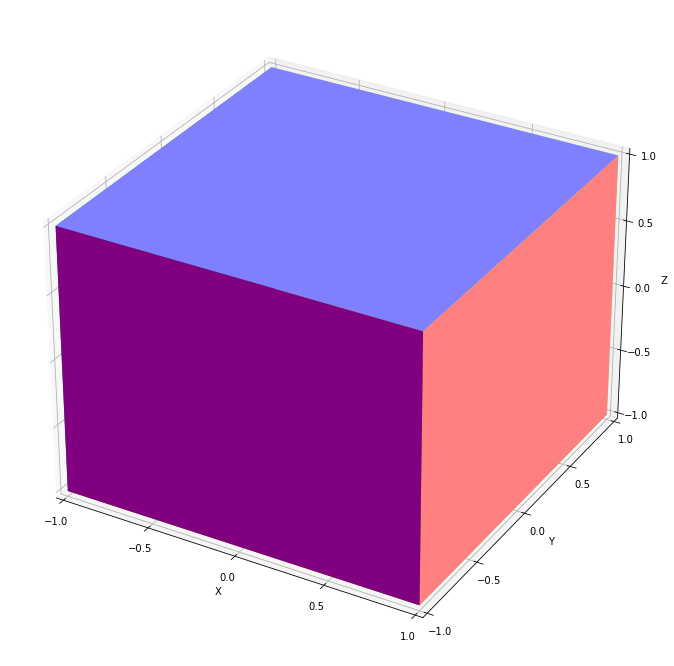

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

plot_mesh(ax, V, F, N, Fn)

## 具体的なモデルの描画

blenderのsuzanneモデルを読み込んでもう少し具体的なモデルを描画してみましょう．

描画してみると，向きがおかしくなっていることに気づくと思います．

numVertices:  507
numUVs:  556
numNormals:  499
numFaces:  500


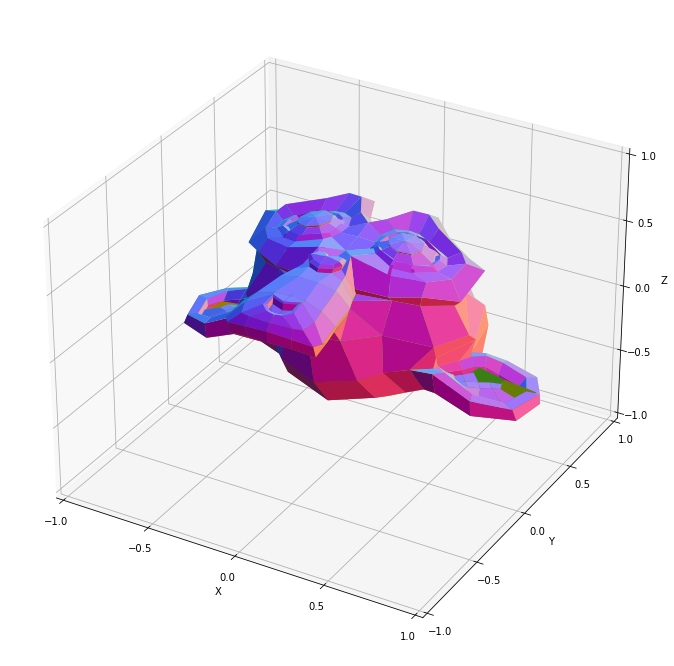

In [7]:
V, F, N, Fn = loadOBJ('suzanne.obj')
V = 2.0*(V-(V.max(0)+V.min(0))/2) / max(V.max(0)-V.min(0))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

plot_mesh(ax, V, F, N, Fn)

## Work: モデルの向きの修正

モデルの向きがおかしくなっている原因はMatplotlibのxyz軸の向きです．

suzanneのモデルは，一般的な3DCGのシステム同様に，
y軸が上向きになるようにデザインされていますので，表示をそれに合わせてみます．

- X軸: Vz
- Y軸: Vx
- Z軸: Vy

Work:
1. Vのxyz座標を表示用にzxyの順番に入れ替えてください．
2. Matplotlibの軸のラベルもzxyの順番になるようにしてください． 

Vのxyz座標の入れ替えには，下記のようなインデックス並び替えが使えます．

```
# 0列: 1列を代入
# 1列: 0列を代入
# 2列: 2列を代入
V = V[:, [1, 0, 2]]

```

Work: 視点を角度パラメータでコントロールできようにしてください．



```
ax.view_init(elev=elev, azim=azim)
```




In [8]:
def plot_mesh(ax, V, F, N, Fn, elev=20, azim=30):
  # Work: Vのxyz座標を表示用にzxyの順番に入れ替えてください．
  V_zxy = V[:, [0, 1, 2]]

  num_faces = len(F)

  colors = np.clip(0.5 * N + 0.5, 0, 1)

  FVs = [V_zxy[F[i]] for i in range(num_faces)]
  FCs = [colors[Fn[i][0], :] for i in range(num_faces)]

  ax.add_collection3d(art3d.Poly3DCollection(FVs,facecolor=FCs, edgecolor=[0, 0.7, 0], alpha=1.0, linewidth=0.0))

  # Work: ラベルの順番を適切に入れ替えましょう．
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')

  ax.set_xlim(-1, 1)
  ax.set_ylim(-1, 1)
  ax.set_zlim(-1, 1)

  ax.set_xticks(np.linspace(-1, 1, 5))
  ax.set_yticks(np.linspace(-1, 1, 5))
  ax.set_zticks(np.linspace(-1, 1, 5));

  # Work: 視点を移動させるコードを書いてみましょう．
  # ax.view_init(...)

以下で実際に描画して確かめてみましょう．

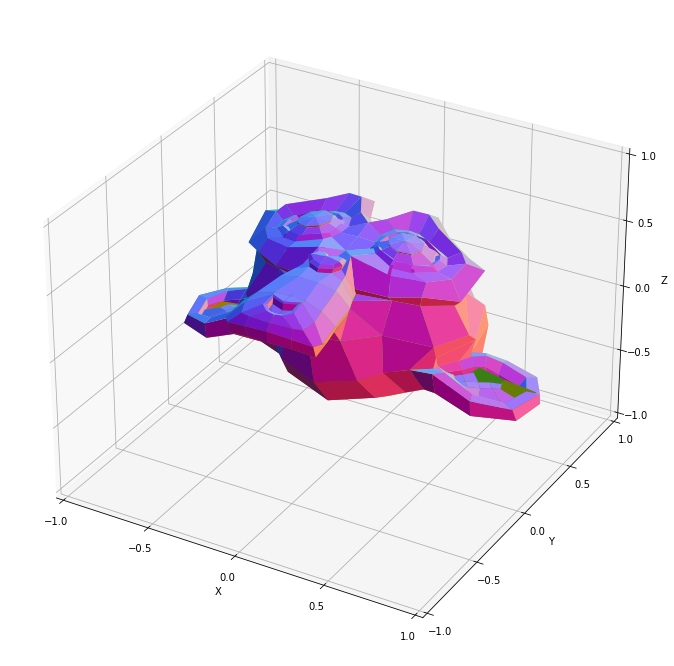

In [9]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

plot_mesh(ax, V, F, N, Fn, elev=20, azim=30)